<a href="https://colab.research.google.com/github/pavi-1994/Principal-Component-Analysis-PCA-/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis (PCA):


Principal Component Analysis (PCA) is a technique used for dimensionality reduction and data visualization. It works by transforming the data into a new coordinate system where the axes are the directions of maximum variance in the data. The first principal component captures the most variance, the second captures the second most, and so on.

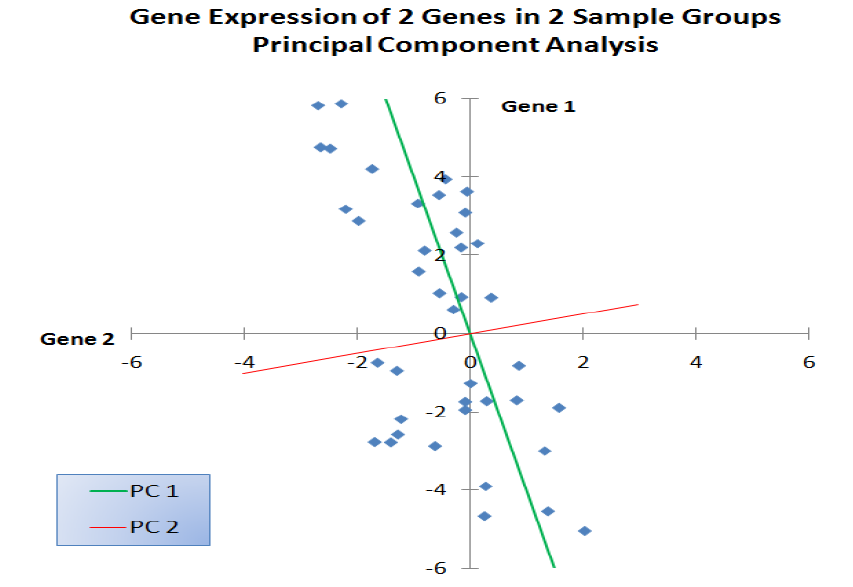

It is a powerful technique used to simplify and understand complex datasets. It works by transforming the data in a way that highlights the most important information.

1. **Standardize the Data**: If the features in your dataset have different scales, it's crucial to standardize them. This ensures that each feature contributes equally to the PCA process, preventing any single feature from dominating the analysis.

2. **Calculate the Covariance Matrix**:  PCA begins by computing the covariance matrix of the standardized data. This matrix provides insights into how different features relate to one another. It uncovers patterns and dependencies within the data.

3. **Calculate Eigenvalues and Eigenvectors**: The eigenvalues and eigenvectors of the covariance matrix are then calculated. These values represent the magnitude and direction of the principal components. Essentially, they reveal the most significant directions of variation in the data.

4. **Sort Eigenvalues and Corresponding Eigenvectors**: The eigenvalues are sorted in descending order. This ensures that the most important components come first. The corresponding eigenvectors represent these principal components, which capture the most critical aspects of the data.

5. **Select Principal Components**: Depending on the level of detail you want to retain, you can choose a certain number of top eigenvectors (principal components). This choice is guided by the percentage of total variance you aim to preserve (e.g., 95%).

6. **Project Data onto Principal Components**: The selected eigenvectors are used to transform the original data. This results in a reduced-dimensional representation that maintains the most valuable information.

7.**Interpret the Results**: With the reduced data, you can now analyze and interpret the results. Visualizations are particularly useful for understanding the data in this simplified space. They provide a clearer view of underlying patterns and relationships.

Download the dataset by clicking this link https://visualize.data.gov.in/?inst=30890ef5-6194-4500-9751-c4e1df1ef76c  X-axis year and  Y-axis (National waterways-I, National Waterways-II, National waterways-III) Apply Principle component analysis without any library packages of PCA (Use only mathematical library  packages)  and reduce its dimension (Graphical Visualization is Mandatory)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path="/content/drive/MyDrive/Gilbert_internship/national_waterways.csv"

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
df

,YEAR,National Waterways- I,National Waterways- II,National Waterways-III,Total
0,2003-04,1596,296,219,2111
1,2004-05,3119,381,154,3654
2,2005-06,4109,322,169,4600
3,2006-07,5803,1728,149,7680
4,2007-08,7092,422,89,7603
5,2008-09,7068,142,109,7319
6,2009-10,10402,74,97,10573
7,2010-11,12302,573,142,13017
8,2011-12,14546,613,132,15291
9,2012-13,15119,580,139,15838


### Here we exclude year column  because it is a categorical variable and it does not have meaningfull relation with other variable in data

### also we are going to avoid the total  column because  which is nothing but sum of national water ways 1, national waterways 2 and national water ways 3  including total can introduce noise it may reduce the quality of finding meaning full relation

In [ ]:
data = df[['National Waterways- I', 'National Waterways- II', 'National Waterways-III']].values

In [ ]:
def calculate_covariance_matrix(data):
    n = data.shape[0]
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    m = centered_data.shape[1]
    cov_matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            cov_matrix[i, j] = np.sum(centered_data[:, i] * centered_data[:, j]) / (n - 1)

    return cov_matrix

In [ ]:
cov_matrix = calculate_covariance_matrix(data)
cov_matrix

array([[ 3.02427818e+07,  1.63589336e+05, -1.01160082e+05],
       [ 1.63589336e+05,  1.93990073e+05,  1.89193636e+03],
       [-1.01160082e+05,  1.89193636e+03,  1.33581818e+03]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(eigenvalues, eigenvectors )

[3.02440107e+07 1.93130551e+05 9.66469315e+02] [[ 0.99997959  0.00540065  0.00341342]
 [ 0.00544358 -0.99990461 -0.01269364]
 [-0.00334454 -0.01271196  0.99991361]]


In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [ ]:
selected_eigenvectors = eigenvectors[:, sorted_indices[:2]]


In [ ]:
def project_onto_eigenvectors(data, eigenvectors):
    n = data.shape[0]
    m = eigenvectors.shape[1]
    reduced_data = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            for k in range(data.shape[1]):
                reduced_data[i, j] += data[i, k] * eigenvectors[k, j]

    return reduced_data

In [ ]:
final_reduced_data=project_onto_eigenvectors(data , selected_eigenvectors)
final_reduced_data

array([[ 1596.84627258,  -290.13623994],
       [ 3120.49528808,  -366.07665788],
       [ 4110.10374351,  -301.92631683],
       [ 5811.78973311, -1698.38925731],
       [ 7093.85478295,  -384.78966879],
       [ 7068.26417985,  -105.20023147],
       [10401.8661058 ,   -19.04839146],
       [12304.39316979,  -508.31158855],
       [14548.59855952,  -536.06158447],
       [15121.38381504,  -500.05914075],
       [18514.46770023,  -495.44100901]])

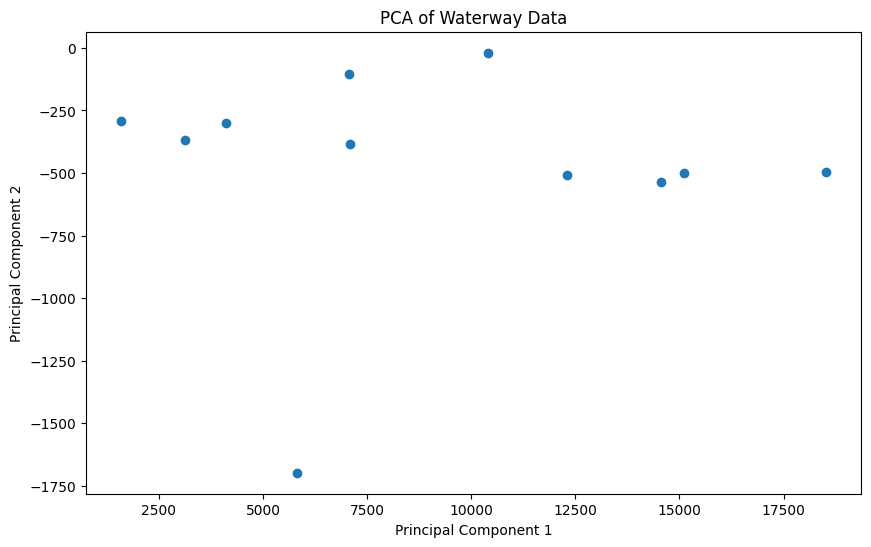

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(final_reduced_data[:, 0], final_reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Waterway Data')
plt.show()

#### Advantages of PCA:
1. Dimensionality Reduction
2. Removal of Redundancy
3. Visualizing Complex Data
4. Improving Model Performance
5. Speeding Up Computation


#### Disadvantages of PCA:
1. Loss of Interpretability
2. Sensitive to Scaling
3. Non-linear Relationships
4. May Not Capture Outliers or Noise
6. Requires Orthogonality
7. Limited to Linear Transformations